# Basics of cluster analysis

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [30]:
data = pd.read_csv('Countries-exercise.csv')

In [31]:
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plot the data

<function matplotlib.pyplot.show(*args, **kw)>

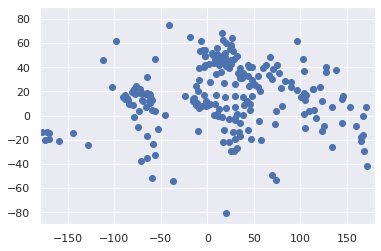

In [32]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

In [33]:
x = data.iloc[:,1:3]

In [34]:
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

In [41]:
kmeans = KMeans(5)

In [42]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [43]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 4, 0, 3, 0, 1, 3, 2, 0, 0, 2, 2, 2,
       3, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 0, 0, 2, 1, 3, 2, 2,
       0, 0, 4, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 3, 1, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       3, 1, 3, 0, 1, 2, 1, 2, 3, 2, 0, 3, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       3, 0, 0, 0, 0, 3, 1, 1, 3, 2, 0, 3, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2,
       3, 1, 2, 2, 2, 0, 0, 1, 3, 2, 2, 2, 3, 2, 3, 3, 0, 2, 1, 0, 0, 3,
       0, 3, 2, 3, 2, 1, 4, 2, 2, 0, 3, 3, 0, 0, 1, 4, 1, 3, 3, 3, 2, 1,
       3, 2, 1, 2, 4, 0, 2, 3, 0, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 3, 0, 0, 3, 4, 1, 2,
       2, 3, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 3, 3, 4, 4, 0, 0, 0, 0],
      dtype=int32)

In [44]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


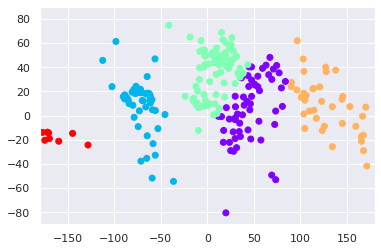

In [45]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [46]:
type(pd.DataFrame({'frequenci':{'2020-02-02': 2}}).index[0])

str

## Better number of clusters

In [47]:
wcss=dict()

for i in range(1,21):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss[i] = kmeans.inertia_

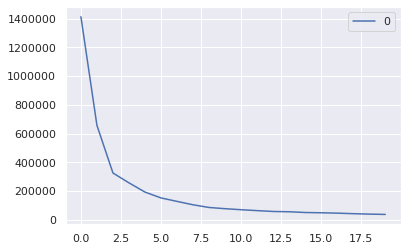

In [53]:
pd.DataFrame(wcss.values()).plot()

5 Clusters seems to be enought